# The aim of this project is to webscrape data from the internet using beautiful soup and perform analysis to gain insight using python visualisation tools
## The data gives insight on the comparison between inflation rate of Nigeria and other countries in europe 
## The data was scraped from this link:[link](https://www.worlddata.info/africa/nigeria/inflation-rates.php)

In [4]:
#importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests

In [5]:
#using beautiful soup API to get the content of the table data in the website
url='https://www.worlddata.info/africa/nigeria/inflation-rates.php'
data=requests.get(url)
soup=BeautifulSoup(data.content)

In [6]:
header_list=[]
for header in soup.find_all('th'):#get the header of the table 
    header_list.append(header.text)
df=pd.DataFrame(columns=header_list)#make the header of the table the column name in our dataframe
list_of_rows=[]
#get each row in the table and assign it as a dataframe
table_row=soup.find_all('tr')
for i in range(1,len(table_row)):
    list_of_rows_with_tags=[]
    tb=table_row[i]     
    for row in tb:
        list_of_rows_with_tags.append(row.text) 
    list_of_rows.append(list_of_rows_with_tags)
for df_rows in list_of_rows:
    df.loc[df.shape[0]]=df_rows
df

,Year,Nigeria,Ø EU,Ø USA,Ø World
0,2021,16.95 %,2.55 %,4.70 %,3.50 %
1,2020,13.25 %,0.50 %,1.23 %,1.92 %
2,2019,11.40 %,1.63 %,1.81 %,2.19 %
3,2018,12.09 %,1.74 %,2.44 %,2.44 %
4,2017,16.52 %,1.43 %,2.13 %,2.19 %
...,...,...,...,...,...
57,1964,0.86 %,3.42 %,1.28 %,n/a
58,1963,-2.69 %,2.92 %,1.24 %,n/a
59,1962,5.27 %,3.55 %,1.20 %,n/a
60,1961,6.28 %,2.08 %,1.07 %,n/a


In [7]:
columnnames=df.columns
columnnames

Index(['Year', 'Nigeria', 'Ø EU', 'Ø USA', 'Ø World'], dtype='object')

# Cleaning Stage

In [8]:
#column names are not well labelled,the empty space after Ø should be replaced with _
new_column=[]
for i in columnnames:
    if ' ' in i:
        new_col=i.replace(' ','_')
        new_column.append(new_col)
    else:
        new_column.append(i)

df.columns=new_column
df

,Year,Nigeria,Ø_EU,Ø_USA,Ø_World
0,2021,16.95 %,2.55 %,4.70 %,3.50 %
1,2020,13.25 %,0.50 %,1.23 %,1.92 %
2,2019,11.40 %,1.63 %,1.81 %,2.19 %
3,2018,12.09 %,1.74 %,2.44 %,2.44 %
4,2017,16.52 %,1.43 %,2.13 %,2.19 %
...,...,...,...,...,...
57,1964,0.86 %,3.42 %,1.28 %,n/a
58,1963,-2.69 %,2.92 %,1.24 %,n/a
59,1962,5.27 %,3.55 %,1.20 %,n/a
60,1961,6.28 %,2.08 %,1.07 %,n/a


In [9]:
#The dataframe has no null value
df.isna().sum()

Year       0
Nigeria    0
Ø_EU       0
Ø_USA      0
Ø_World    0
dtype: int64

In [10]:
#There are no duplicated values
df[df.duplicated()]

,Year,Nigeria,Ø_EU,Ø_USA,Ø_World


In [11]:
#This function will clean the Nigeria and USA columns and convert to float
def funcs(x):
    return float(x.strip('%'))

In [12]:
#This function will clean the EU column and replace n/a with 0
def function(x):
    return float(x.strip('%').replace('n/a','0'))

In [13]:
df.Year=df.Year.astype(int)

In [14]:
df['Nigeria'] = df['Nigeria'].apply(funcs)

In [15]:
df['Ø_USA']=df['Ø_USA'].apply(funcs)

In [16]:
df['Ø_EU'] =df['Ø_EU'].apply(funcs)

In [17]:
df['Ø_World']= df['Ø_World'].apply(function)

# Performing exploratory analysis on the dataset

In [18]:
df.describe()

,Year,Nigeria,Ø_EU,Ø_USA,Ø_World
count,62.000000,62.000000,62.000000,62.000000,62.000000
mean,1990.500000,15.804194,4.408548,3.696290,3.742903
std,18.041619,15.148224,3.125897,2.752853,3.635899
min,1960.000000,-3.730000,-0.060000,-0.360000,0.000000
25%,1975.250000,7.505000,2.420000,1.832500,0.000000
50%,1990.500000,11.900000,3.485000,2.985000,3.055000
75%,2005.750000,16.842500,5.877500,4.297500,6.367500
max,2021.000000,72.840000,13.160000,13.550000,13.980000


In [19]:
df.corr()

,Year,Nigeria,Ø_EU,Ø_USA,Ø_World
Year,1.000000,0.132331,-0.490122,-0.335974,0.262782
Nigeria,0.132331,1.000000,0.199148,0.101096,0.436249
Ø_EU,-0.490122,0.199148,1.000000,0.862528,0.295744
Ø_USA,-0.335974,0.101096,0.862528,1.000000,0.200346
Ø_World,0.262782,0.436249,0.295744,0.200346,1.000000


Text(0.5, 1.0, 'GRAPH OF INFLATION RATE OF NIGERIA,USA,EUROPE AND WORLD BETWEEN 1960-2021 ')

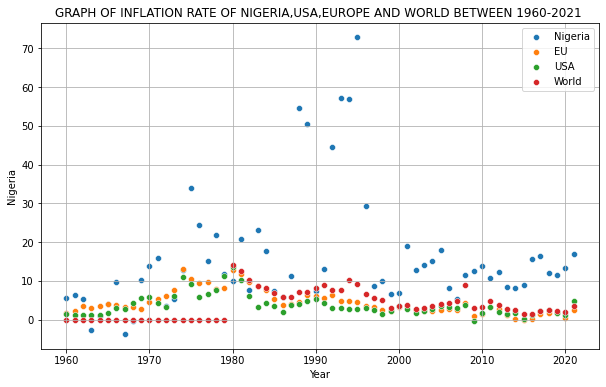

In [20]:
plt.figure(figsize=[10,6])
sns.scatterplot(y=df['Nigeria'],x=df['Year'],data=df)
sns.scatterplot(y=df['Ø_EU'],x=df['Year'],data=df)
sns.scatterplot(y=df['Ø_USA'],x=df['Year'],data=df)
sns.scatterplot(y=df['Ø_World'],x=df['Year'],data=df)
plt.grid('darkgrid')
plt.legend(labels=['Nigeria','EU','USA','World'])
plt.title("Graph of inflation rate of nigeria,usa,europe and World between 1960-2021 ".upper())

# CONCLUSION
* World inflation rate was stable from year 1960 to 1980,but the inflation rate rose in year 1980 above 10% but later dropped and never got to that level again.
* European union had a spike in inflation rate around year 1974 and 1980 but it dropped steadily.
* USA had  a little stable inflation rate between 1960 to 1970,but experienced a rise and fall between 1970 to 1990, then  between year 1990 to 2020,it was a bit stable
* Nigeria has the highest inflation rate amongst the four.The inflation rate rose around 1975 and dropped,its rose again around   1988 to 1993.Then the country experienced a very sharp spike in year 1995 which was above 70%.